In [1]:
from stompy.model.suntans import sun_driver
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib notebook

In [5]:
#model=sun_driver.SuntansModel.load("/opt2/sfb_ocean/suntans/runs/merge_010-201706/")
model=sun_driver.SuntansModel.load("/opt2/sfb_ocean/suntans/runs/merge_009-20170601/")

INFO:DFlowModel:Will read cell depths, too
INFO:DFlowModel:Will read edge depths, too


In [6]:
model.load_bc_ds()
bc_ds=model.bc_ds

In [9]:
bc_ds

<xarray.Dataset>
Dimensions:      (Nk: 50, Npoint: 3, Nseg: 15, Nt: 9297, Ntype2: 284, Ntype3: 12)
Dimensions without coordinates: Nk, Npoint, Nseg, Nt, Ntype2, Ntype3
Data variables:
    z            (Nk) float64 ...
    time         (Nt) datetime64[ns] 2011-12-29 2011-12-30 ... 2028-12-28
    cellp        (Ntype3) int32 ...
    xv           (Ntype3) float64 ...
    yv           (Ntype3) float64 ...
    uc           (Nt, Nk, Ntype3) float64 ...
    vc           (Nt, Nk, Ntype3) float64 ...
    wc           (Nt, Nk, Ntype3) float64 ...
    T            (Nt, Nk, Ntype3) float64 ...
    S            (Nt, Nk, Ntype3) float64 ...
    h            (Nt, Ntype3) float64 ...
    edgep        (Ntype2) int32 ...
    xe           (Ntype2) float64 ...
    ye           (Ntype2) float64 ...
    boundary_h   (Nt, Ntype2) float64 ...
    boundary_u   (Nt, Nk, Ntype2) float64 ...
    boundary_v   (Nt, Nk, Ntype2) float64 ...
    boundary_w   (Nt, Nk, Ntype2) float64 ...
    boundary_T   (Nt, Nk, Ntype2

In [12]:
bc_ds.seg_name[1].item()

'SJRiver'

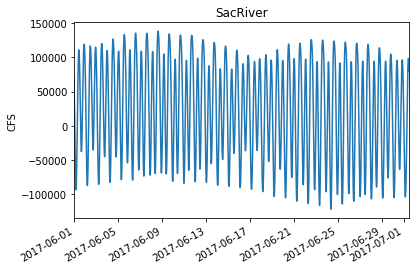

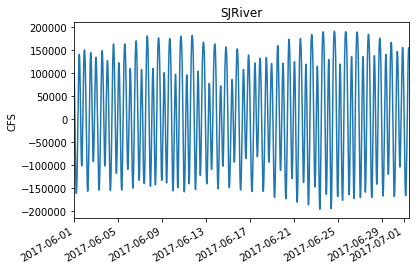

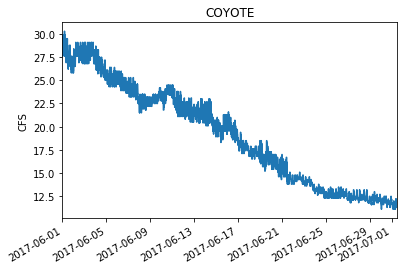

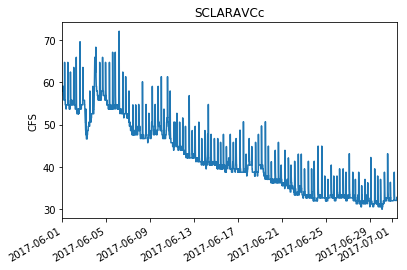

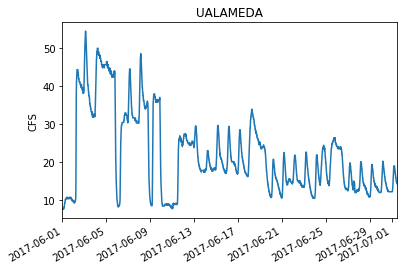

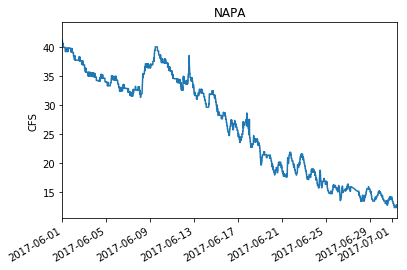

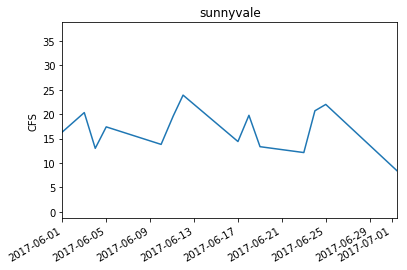

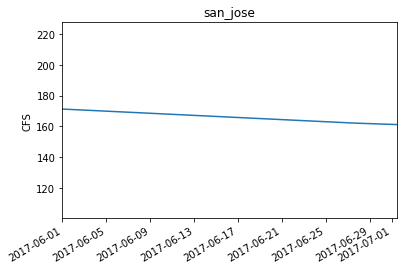

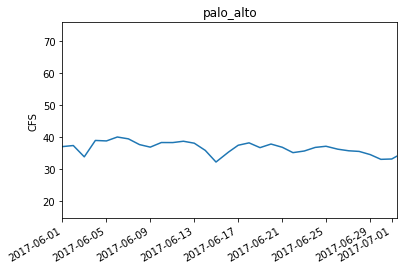

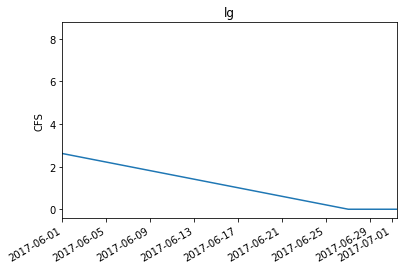

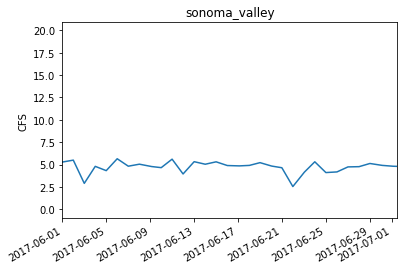

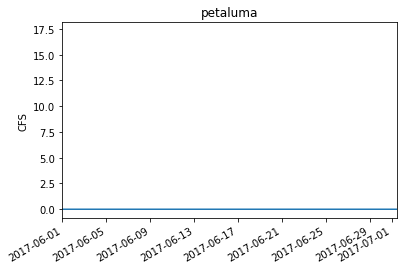

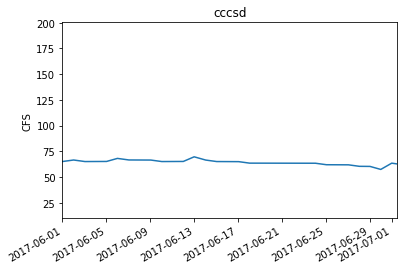

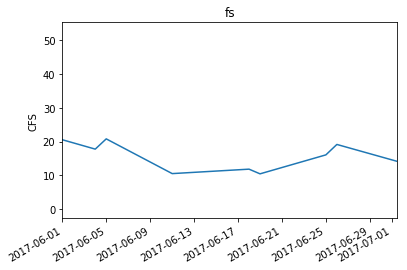

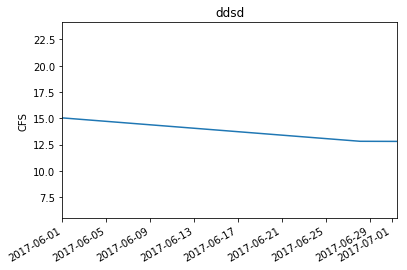

In [15]:
for nseg in bc_ds.Nseg:
    fig=plt.figure()
    # Plot as CFS for easier comparison to USGS plots
    name=bc_ds.seg_name[nseg].item()
    plt.plot(bc_ds.time, 35.3* bc_ds.boundary_Q.isel(Nseg=nseg), label=name)
    plt.title(name)
    plt.axis(xmin=model.run_start,xmax=model.run_stop)
    plt.ylabel('CFS')
    fig.autofmt_xdate()